In [111]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [112]:
def show_image(image,cmap=""):
    if not cmap:
        plt.imshow(image)
    else:
        plt.imshow(image,cmap=cmap)

    # display that image
    plt.show()

In [113]:
path = "../data/passport_data/sample_scan.jpg"

In [114]:
image = cv2.imread(path) # path = path to your file
# bin = cv2.inRange(image, (255, 255, 255), (255, 255,255))
# cv2.bitwise_not(bin, bin)
# cnts = cv2.findContours(bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cnts = imutils.grab_contours(cnts)
# cnts = sorted(cnts, key = cv2.contourArea, reverse = True)
# x,y,w,h = cv2.boundingRect(cnts[0])
# # cv2.rectangle(image, rect, (0,255,0), 1)

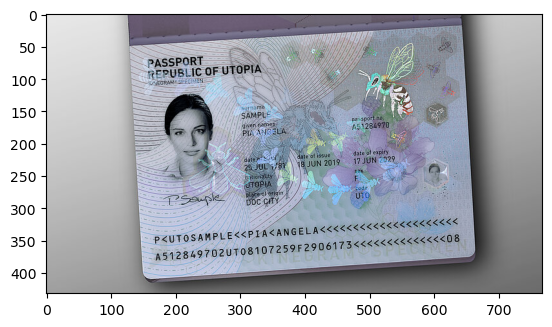

In [115]:
show_image(image)

In [116]:
# MASK = np.array(image/255.0, dtype='float32')

# MASK = cv2.GaussianBlur(MASK, (3,3), 11)

In [117]:
# show_image(MASK)

In [118]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

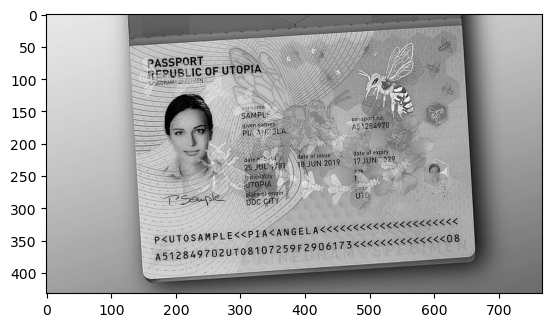

In [119]:
show_image(img_gray,"gray")

In [136]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [141]:
edges = cv2.Canny(gray, 150, 250)

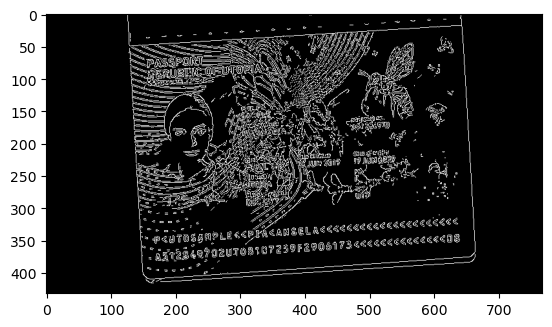

In [142]:
show_image(edges,"gray")

In [143]:
cnts = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [144]:
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

In [145]:
len(cnts)

1633

In [1136]:
#cnts = sorted(cnts, key = cv2.contourArea, reverse = True)

STEP 2: Finding Boundary
STEP 2: Finding Boundary
STEP 2: Finding Boundary


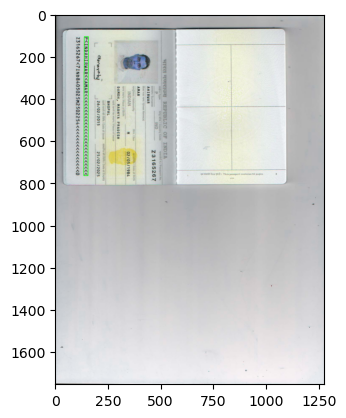

In [1137]:
for c in cnts:
    ### Approximating the contour
    #Calculates a contour perimeter or a curve length
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01 * peri, True)
    # if our approximated contour has four points, then we
    # can assume that we have found our screen
    screenCnt = approx
    if len(approx) == 4:
        screenCnt = approx
        break
    # show the contour (outline) 
    print("STEP 2: Finding Boundary")
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
image_e = cv2.resize(image,(image.shape[1],image.shape[0]))
cv2.imwrite('image_edge.jpg',image_e)
plt.imshow(image_e)
plt.show()

In [133]:
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

In [134]:
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, rectKernel)

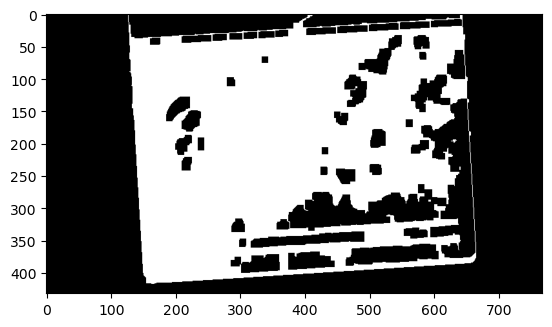

In [135]:
show_image(thresh,"gray")

In [88]:
kernel = np.ones((3, 3), np.uint8)
dilated_edges = cv2.erode(edges, kernel, iterations=1)

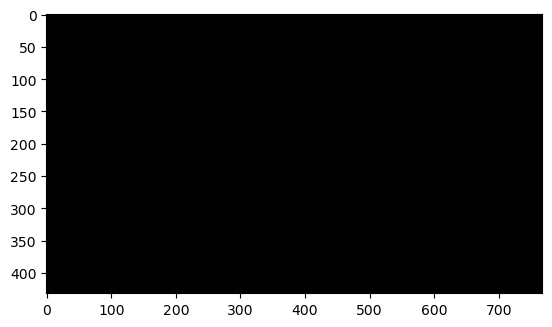

In [89]:
show_image(dilated_edges,"gray")

In [49]:
def extract_corners(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Dilate the edges to close gaps
    kernel = np.ones((3, 3), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)

        if len(approx) == 4:
            return approx

    return None

In [50]:
# def perspective_transform(image, corners):
#     width, height = 250, 350
#     destination_corners = np.float32([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]])

#     transformation_matrix = cv2.getPerspectiveTransform(corners, destination_corners)
#     transformed_image = cv2.warpPerspective(image, transformation_matrix, (width, height))

#     return transformed_image

In [51]:
# def perspective_transform(image, corners):
#     width, height = 250, 350
#     destination_corners = np.float32([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]])

#     source_corners = np.float32([corners[0][0], corners[1][0], corners[2][0], corners[3][0]])
    
#     transformation_matrix = cv2.getPerspectiveTransform(source_corners, destination_corners)
#     transformed_image = cv2.warpPerspective(image, transformation_matrix, (width, height))

#     return transformed_image

In [52]:
# def perspective_transform(image, corners, interpolation=cv2.INTER_LINEAR):
#     width, height = 250, 350
#     destination_corners = np.float32([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]])

#     source_corners = np.float32([corners[0][0], corners[1][0], corners[2][0], corners[3][0]])
    
#     transformation_matrix = cv2.getPerspectiveTransform(source_corners, destination_corners)
#     transformed_image = cv2.warpPerspective(image, transformation_matrix, (width, height), flags=interpolation)

#     return transformed_image

In [53]:
# def perspective_transform(image, corners,interpolation=cv2.INTER_LINEAR):
#     original_width, original_height = image.shape[1], image.shape[0]
#     destination_width, destination_height = 600, 0

#     aspect_ratio = original_width / original_height
#     destination_height = int(destination_width / aspect_ratio)

#     destination_corners = np.float32([[0, 0], [destination_width - 1, 0], [destination_width - 1, destination_height - 1], [0, destination_height - 1]])

#     source_corners = np.float32([corners[0][0], corners[1][0], corners[2][0], corners[3][0]])
    
#     transformation_matrix = cv2.getPerspectiveTransform(source_corners, destination_corners)
#     transformed_image = cv2.warpPerspective(image, transformation_matrix, (destination_width, destination_height),flags=interpolation)

#     return transformed_image

In [54]:
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")

    s = np.sum(pts, axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    return rect

In [55]:
def perspective_transform(image, corners,width):
    aspect_ratio = float(image.shape[1]) / float(image.shape[0])
    height = int(width / aspect_ratio)

    ordered_corners = order_points(corners.reshape(4, 2))
    pts1 = np.float32(ordered_corners)

    pts2 = np.float32([[0, 0], [width, 0], [width, height], [0, height]])

    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(image, matrix, (width, height))

    return result

corners =  [[[334  59]]

 [[374 120]]

 [[377  64]]

 [[365  94]]]


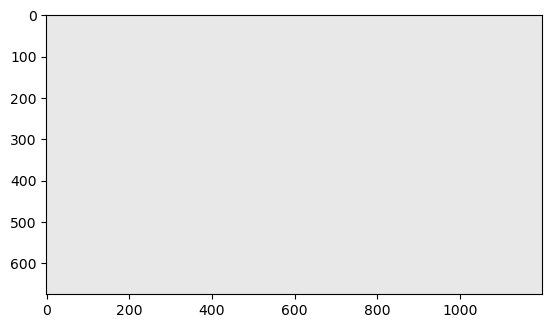

In [56]:
# Extract corners
corners = extract_corners(image)
print('corners = ',corners)
if corners is not None:
    # Set the desired width
    desired_width = 1200
    # Perform perspective transformation
    transformed_image = perspective_transform(image, corners,desired_width)
    show_image(transformed_image)
    
else:
    print("Unable to find ID card corners.")